# **Advanced Customer Churn Analysis**

#**1. Data Loading and Initial Inspection**

**Load the telecom dataset into a Pandas DataFrame.**

In [1]:
import pandas as pd

# Load the dataset
file_path = 'customer_churn_data.csv'
telecom_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(telecom_data.head())


   CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49    Male       4           88.35  Month-to-Month   
1           2   43    Male       0           36.67  Month-to-Month   
2           3   51  Female       2           63.79  Month-to-Month   
3           4   60  Female       8          102.34        One-Year   
4           5   42    Male      32           69.01  Month-to-Month   

  InternetService  TotalCharges TechSupport Churn  
0     Fiber Optic        353.40         Yes   Yes  
1     Fiber Optic          0.00         Yes   Yes  
2     Fiber Optic        127.58          No   Yes  
3             DSL        818.72         Yes   Yes  
4             NaN       2208.32          No   Yes  


**Print the column names, data types, and descriptive statistics.**

In [2]:
# Print column names
print("Column Names:")
print(telecom_data.columns)

# Print data types
print("\nData Types:")
print(telecom_data.dtypes)

# Print descriptive statistics
print("\nDescriptive Statistics:")
print(telecom_data.describe(include='all'))  # Include='all' to show statistics for all columns


Column Names:
Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

Data Types:
CustomerID           int64
Age                  int64
Gender              object
Tenure               int64
MonthlyCharges     float64
ContractType        object
InternetService     object
TotalCharges       float64
TechSupport         object
Churn               object
dtype: object

Descriptive Statistics:
         CustomerID          Age  Gender      Tenure  MonthlyCharges  \
count   1000.000000  1000.000000    1000  1000.00000     1000.000000   
unique          NaN          NaN       2         NaN             NaN   
top             NaN          NaN  Female         NaN             NaN   
freq            NaN          NaN     538         NaN             NaN   
mean     500.500000    44.674000     NaN    18.97300       74.391290   
std      288.819436     9.797741     NaN    18.89257  

**Check for missing values and duplicates in the dataset.**

In [3]:
# Check for missing values
print("Missing Values:")
print(telecom_data.isnull().sum())

# Check for duplicates
print("\nNumber of Duplicate Rows:")
print(telecom_data.duplicated().sum())


Missing Values:
CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

Number of Duplicate Rows:
0


**Summarize the target variable (Churn) distribution.**

In [4]:
# Summarize the distribution of the target variable (Churn)
if 'Churn' in telecom_data.columns:
    print("Churn Distribution:")
    print(telecom_data['Churn'].value_counts())

    # Display percentage distribution
    print("\nChurn Percentage Distribution:")
    print(telecom_data['Churn'].value_counts(normalize=True) * 100)
else:
    print("The column 'Churn' is not in the dataset.")


Churn Distribution:
Churn
Yes    883
No     117
Name: count, dtype: int64

Churn Percentage Distribution:
Churn
Yes    88.3
No     11.7
Name: proportion, dtype: float64


#**2. Data Cleaning and Preprocessing**

**Handle missing values:**

o **Impute numerical columns with median or mean.**

o ***Impute categorical columns with the mode. ***

In [5]:
# Separate numerical and categorical columns
numerical_cols = telecom_data.select_dtypes(include=['number']).columns
categorical_cols = telecom_data.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numerical columns
for col in numerical_cols:
    median_value = telecom_data[col].median()
    telecom_data[col].fillna(median_value, inplace=True)  # Use median by default
    # Uncomment the line below to use mean instead of median
    # telecom_data[col].fillna(telecom_data[col].mean(), inplace=True)

# Impute missing values for categorical columns
for col in categorical_cols:
    mode_value = telecom_data[col].mode()[0]
    telecom_data[col].fillna(mode_value, inplace=True)

# Confirm missing values have been handled
print("Missing values after imputation:")
print(telecom_data.isnull().sum())


Missing values after imputation:
CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64


<ipython-input-5-623d08cdc96e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_data[col].fillna(median_value, inplace=True)  # Use median by default
<ipython-input-5-623d08cdc96e>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

**Remove duplicate rows, if any.**

In [6]:
# Check for duplicates before removal
print(f"Number of duplicate rows before removal: {telecom_data.duplicated().sum()}")

# Remove duplicate rows
telecom_data = telecom_data.drop_duplicates()

# Check for duplicates after removal
print(f"Number of duplicate rows after removal: {telecom_data.duplicated().sum()}")


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


**Convert all categorical features into numeric using one-hot encoding.**

In [7]:
# Perform one-hot encoding for categorical columns
telecom_data_encoded = pd.get_dummies(telecom_data, drop_first=True)

# Display the updated dataset
print("Dataset after One-Hot Encoding:")
print(telecom_data_encoded.head())

# Display the new shape of the dataset
print("\nShape of the dataset after encoding:", telecom_data_encoded.shape)


Dataset after One-Hot Encoding:
   CustomerID  Age  Tenure  MonthlyCharges  TotalCharges  Gender_Male  \
0           1   49       4           88.35        353.40         True   
1           2   43       0           36.67          0.00         True   
2           3   51       2           63.79        127.58        False   
3           4   60       8          102.34        818.72        False   
4           5   42      32           69.01       2208.32         True   

   ContractType_One-Year  ContractType_Two-Year  InternetService_Fiber Optic  \
0                  False                  False                         True   
1                  False                  False                         True   
2                  False                  False                         True   
3                   True                  False                        False   
4                  False                  False                         True   

   TechSupport_Yes  Churn_Yes  
0             Tr

#**3. Exploratory Data Analysis (EDA)**

**Plot the distribution of the following features:**

o **Tenure**

o **Monthly Charges**

o **Total Charges**

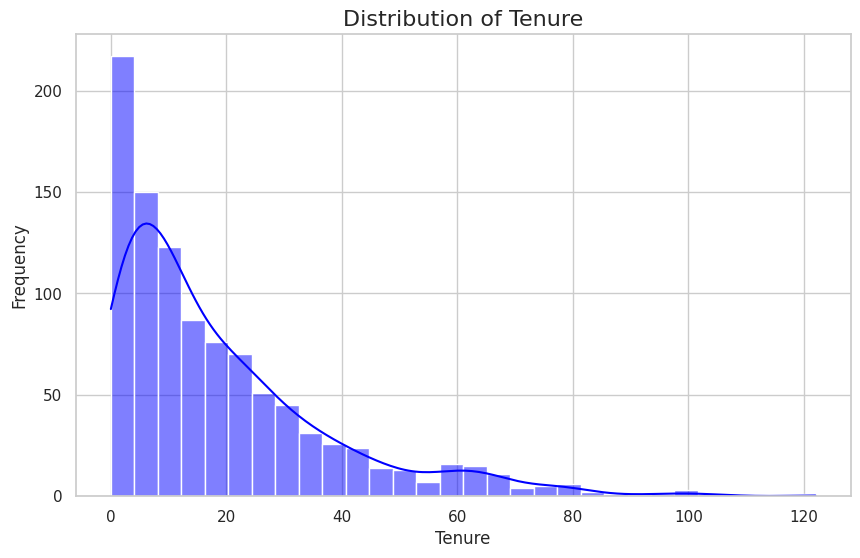

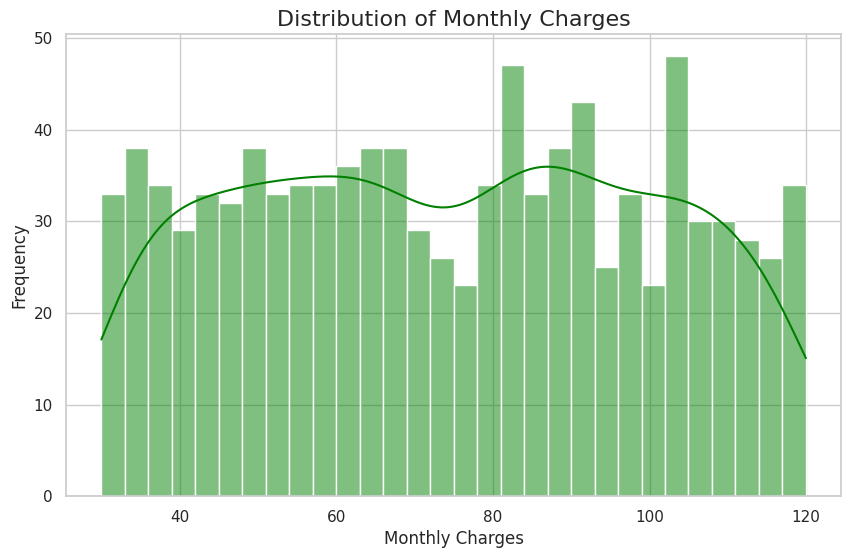

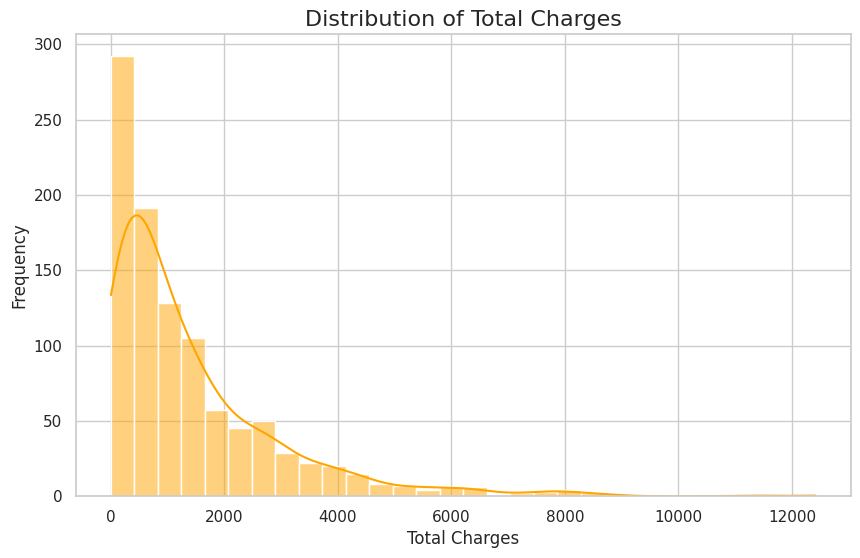

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'customer_churn_data.csv'
telecom_data = pd.read_csv(file_path)

# Set the style of the plots
sns.set(style="whitegrid")

# Plot distribution for 'Tenure'
# Changed 'tenure' to 'Tenure' to match the actual column name in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(telecom_data['Tenure'], kde=True, bins=30, color='blue')
plt.title("Distribution of Tenure", fontsize=16)
plt.xlabel("Tenure", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Plot distribution for 'Monthly Charges'
# Changed 'MonthlyCharges' to 'MonthlyCharges' to match the actual column name in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(telecom_data['MonthlyCharges'], kde=True, bins=30, color='green')
plt.title("Distribution of Monthly Charges", fontsize=16)
plt.xlabel("Monthly Charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Plot distribution for 'Total Charges'
# Changed 'TotalCharges' to 'TotalCharges' to match the actual column name in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(telecom_data['TotalCharges'], kde=True, bins=30, color='orange')
plt.title("Distribution of Total Charges", fontsize=16)
plt.xlabel("Total Charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Identifing the top 3 features contributing to churn using visualizations.**

<ipython-input-8-3d6c67ac4b16>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=telecom_data, palette="coolwarm")


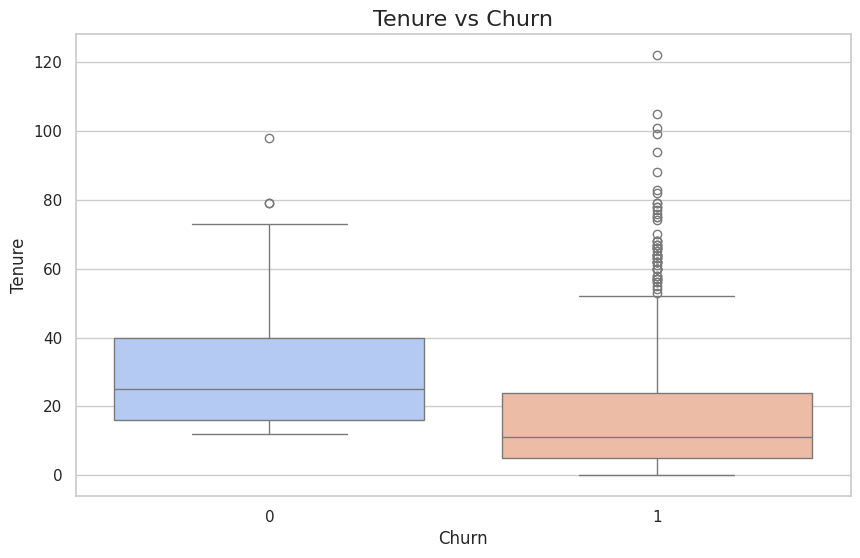

<ipython-input-8-3d6c67ac4b16>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=telecom_data, palette="coolwarm")


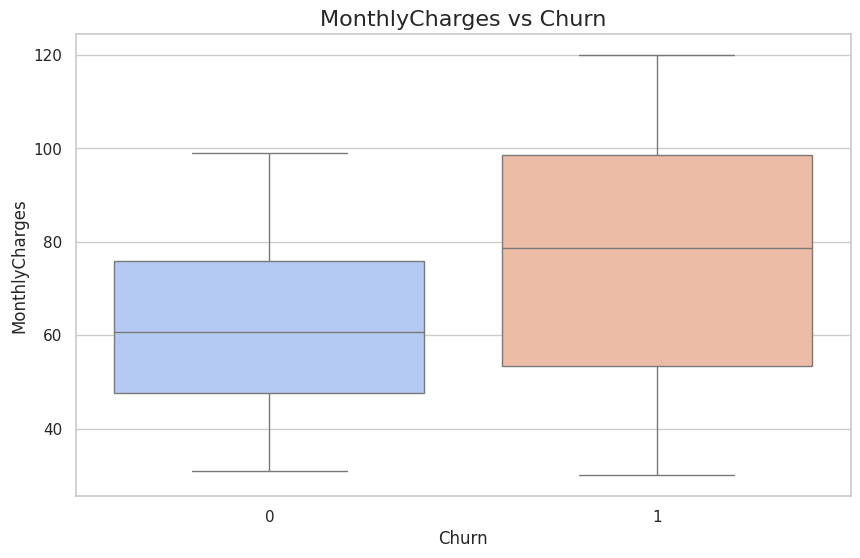

<ipython-input-8-3d6c67ac4b16>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=telecom_data, palette="coolwarm")


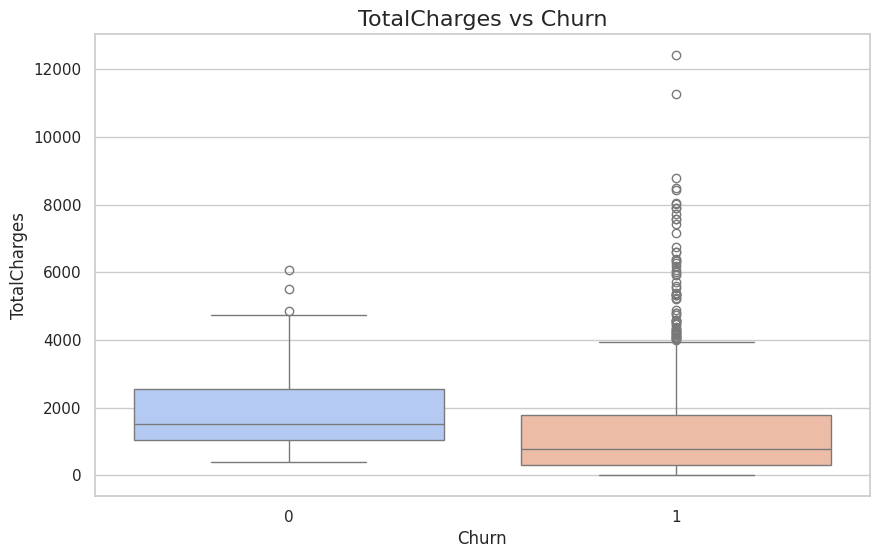

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

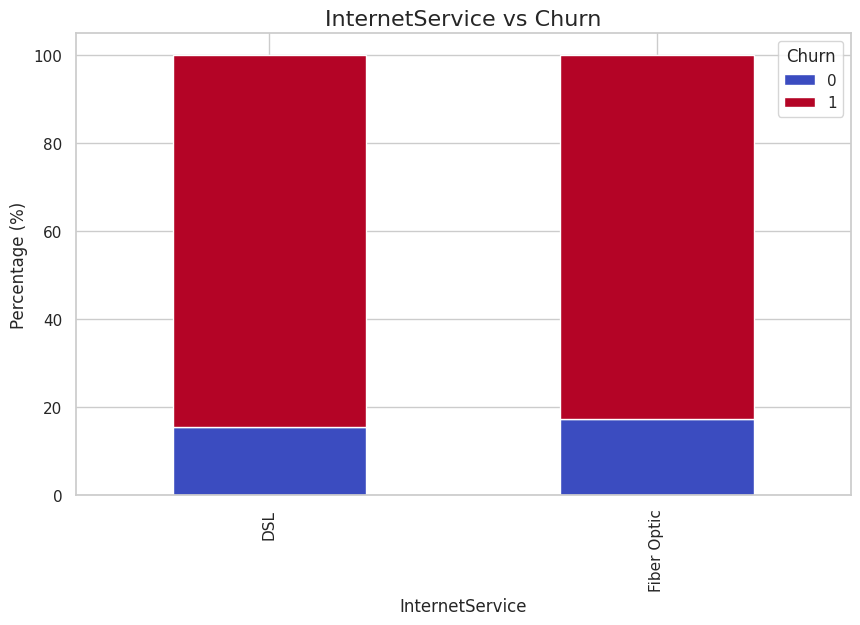

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas


# Load the dataset  # Load the dataset here to ensure 'Contract' column is present
file_path = 'customer_churn_data.csv'
telecom_data = pd.read_csv(file_path)

# Ensure the 'Churn' column is properly encoded or formatted for analysis
if telecom_data['Churn'].dtype != 'object':
    churn_column = telecom_data['Churn']
else:
    churn_column = telecom_data['Churn'].map({'Yes': 1, 'No': 0})  # Convert to binary if needed
    telecom_data['Churn'] = churn_column

# Function to plot feature vs. churn
def plot_feature_vs_churn(feature, title, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x='Churn', y=feature, data=telecom_data, palette="coolwarm")
    plt.title(title, fontsize=16)
    plt.xlabel("Churn", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.show()

# Visualize numerical features against churn
top_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']  # Changed 'tenure' to 'Tenure' to match the DataFrame column name
for feature in top_features:
    plot_feature_vs_churn(feature, f"{feature} vs Churn")

# Plot categorical features
categorical_features = ['Contract', 'PaymentMethod', 'InternetService']  # Replace with relevant categorical columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    # Check if the feature exists in the DataFrame
    if feature in telecom_data.columns:
        churn_counts = pd.crosstab(telecom_data[feature], telecom_data['Churn'], normalize='index') * 100
        churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
        plt.title(f"{feature} vs Churn", fontsize=16)
        plt.ylabel("Percentage (%)", fontsize=12)
        plt.show()
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame.")

**Using box plots to compare churn vs. non-churn customers for numerical features.**

Feature 'tenure' not found in the dataset.


<ipython-input-7-91290a76361a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=telecom_data, palette='coolwarm')


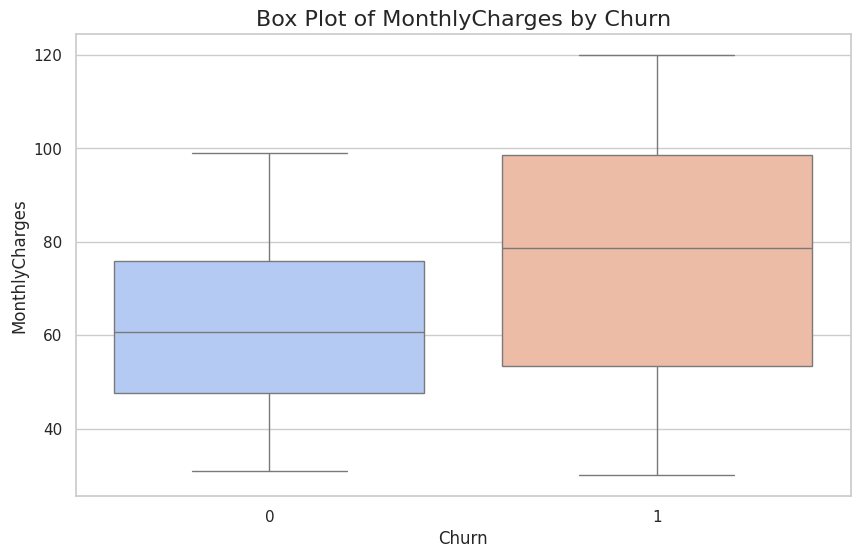

<ipython-input-7-91290a76361a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=telecom_data, palette='coolwarm')


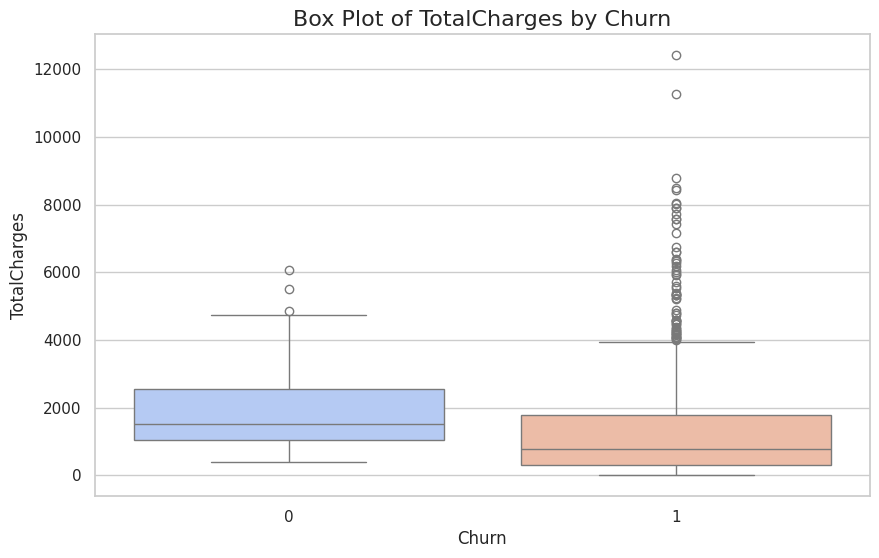

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the target column 'Churn' is properly formatted for analysis
if telecom_data['Churn'].dtype == 'object':
    telecom_data['Churn'] = telecom_data['Churn'].map({'Yes': 1, 'No': 0})  # Convert to binary if needed

# List of numerical features to analyze
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Adjust based on your dataset

# Create box plots for each numerical feature
for feature in numerical_features:
    if feature in telecom_data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Churn', y=feature, data=telecom_data, palette='coolwarm')
        plt.title(f'Box Plot of {feature} by Churn', fontsize=16)
        plt.xlabel('Churn', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.show()
    else:
        print(f"Feature '{feature}' not found in the dataset.")


#**4. Feature Engineering**

**Create new features from existing columns:**

o **Tenure_Group: Group tenure into categories (e.g., 0-12 months, 13-24 months, etc.).**

o **Average_Monthly_Charges: Calculate Total Charges / Tenure.**

In [10]:
import numpy as np

# Create Tenure_Group by binning 'Tenure' into categories
bins = [0, 12, 24, 36, 48, 60, 72]  # Define bins
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61-72 months']  # Labels for bins
# Changed 'tenure' to 'Tenure' to match the actual column name
telecom_data['Tenure_Group'] = pd.cut(telecom_data['Tenure'], bins=bins, labels=labels, right=False)

# Create Average_Monthly_Charges feature
# Replace invalid or missing TotalCharges and Tenure with NaN to avoid divide-by-zero errors
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')
# Changed 'tenure' to 'Tenure' to match the actual column name
telecom_data['Average_Monthly_Charges'] = telecom_data['TotalCharges'] / telecom_data['Tenure']

# Handle NaN values in Average_Monthly_Charges (e.g., due to division by zero or missing TotalCharges)
telecom_data['Average_Monthly_Charges'].fillna(0, inplace=True)

# Display the first few rows to verify the new features
print(telecom_data[['Tenure', 'Tenure_Group', 'TotalCharges', 'Average_Monthly_Charges']].head())

   Tenure  Tenure_Group  TotalCharges  Average_Monthly_Charges
0       4   0-12 months        353.40                    88.35
1       0   0-12 months          0.00                     0.00
2       2   0-12 months        127.58                    63.79
3       8   0-12 months        818.72                   102.34
4      32  25-36 months       2208.32                    69.01


<ipython-input-10-b221655d41d7>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_data['Average_Monthly_Charges'].fillna(0, inplace=True)


**Create interaction features between important numerical columns**
(** **bold text**e.g.,** **Monthly Charges**  * **Tenure**  **).**

In [12]:
# Create interaction features
if 'MonthlyCharges' in telecom_data.columns and 'Tenure' in telecom_data.columns:  # Changed 'tenure' to 'Tenure'
    telecom_data['MonthlyCharges_Tenure'] = telecom_data['MonthlyCharges'] * telecom_data['Tenure']  # Changed 'tenure' to 'Tenure'

# Display the first few rows to verify the new interaction feature
print("Interaction Feature Added:")
# Check if 'MonthlyCharges_Tenure' column exists before printing
if 'MonthlyCharges_Tenure' in telecom_data.columns:
    print(telecom_data[['MonthlyCharges', 'Tenure', 'MonthlyCharges_Tenure']].head())  # Changed 'tenure' to 'Tenure'
else:
    print("MonthlyCharges_Tenure column not created. Check the 'if' condition.")

Interaction Feature Added:
   MonthlyCharges  Tenure  MonthlyCharges_Tenure
0           88.35       4                 353.40
1           36.67       0                   0.00
2           63.79       2                 127.58
3          102.34       8                 818.72
4           69.01      32                2208.32


**Perform scaling or normalization for numerical features.**

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features
numerical_features = telecom_data.select_dtypes(include=['float64', 'int64']).columns

# Option 1: Standard Scaling (mean = 0, std = 1)
scaler = StandardScaler()
telecom_data_scaled = telecom_data.copy()  # Create a copy to preserve the original data
telecom_data_scaled[numerical_features] = scaler.fit_transform(telecom_data[numerical_features])

# Display the first few rows of scaled data
print("Data after Standard Scaling:")
print(telecom_data_scaled[numerical_features].head())

# Option 2: Min-Max Normalization (range = [0, 1])
normalizer = MinMaxScaler()
telecom_data_normalized = telecom_data.copy()
telecom_data_normalized[numerical_features] = normalizer.fit_transform(telecom_data[numerical_features])

# Display the first few rows of normalized data
print("\nData after Min-Max Normalization:")
print(telecom_data_normalized[numerical_features].head())


Data after Standard Scaling:
   CustomerID       Age    Tenure  MonthlyCharges  TotalCharges     Churn  \
0   -1.730320  0.441751 -0.792930        0.543157     -0.668991  0.364009   
1   -1.726856 -0.170941 -1.004760       -1.467799     -0.893948  0.364009   
2   -1.723391  0.645982 -0.898845       -0.412514     -0.812737  0.364009   
3   -1.719927  1.565021 -0.581101        1.087531     -0.372792  0.364009   
4   -1.716463 -0.273057  0.689875       -0.209395      0.511758  0.364009   

   Average_Monthly_Charges  MonthlyCharges_Tenure  
0                 0.599062              -0.668991  
1                -2.356286              -0.893948  
2                -0.222481              -0.812737  
3                 1.067034              -0.372792  
4                -0.047870               0.511758  

Data after Min-Max Normalization:
   CustomerID       Age    Tenure  MonthlyCharges  TotalCharges  Churn  \
0    0.000000  0.521127  0.032787        0.648622      0.028463    1.0   
1    0.001001

#**5. Correlation and Feature Selection**

**Compute the correlation matrix for numerical columns.**

Correlation Matrix:
                         CustomerID       Age    Tenure  MonthlyCharges  \
CustomerID                 1.000000  0.036730 -0.018585       -0.030504   
Age                        0.036730  1.000000  0.000472        0.006362   
Tenure                    -0.018585  0.000472  1.000000       -0.014552   
MonthlyCharges            -0.030504  0.006362 -0.014552        1.000000   
TotalCharges              -0.027490 -0.001896  0.894868        0.304893   
Churn                      0.023867  0.044115 -0.217675        0.167773   
Average_Monthly_Charges   -0.007494  0.004252  0.120256        0.801079   
MonthlyCharges_Tenure     -0.027490 -0.001896  0.894868        0.304893   

                         TotalCharges     Churn  Average_Monthly_Charges  \
CustomerID                  -0.027490  0.023867                -0.007494   
Age                         -0.001896  0.044115                 0.004252   
Tenure                       0.894868 -0.217675                 0.120256   


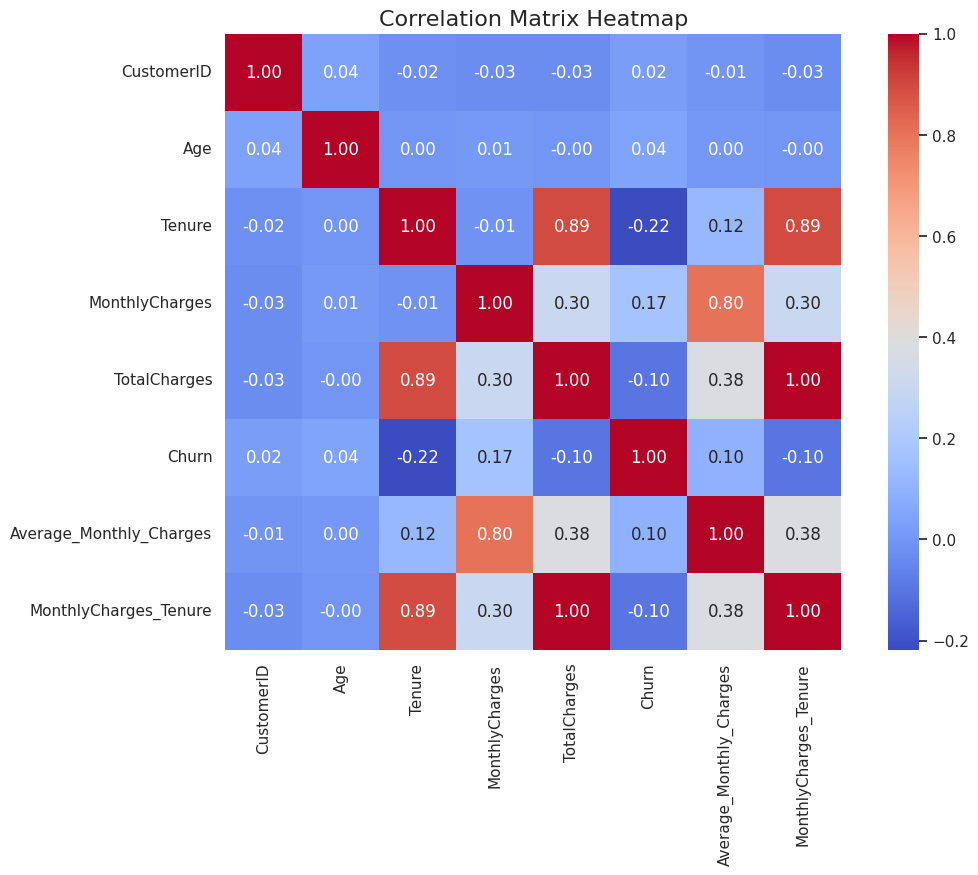

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = telecom_data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = telecom_data[numerical_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


**Visualize the correlation using a heatmap.**

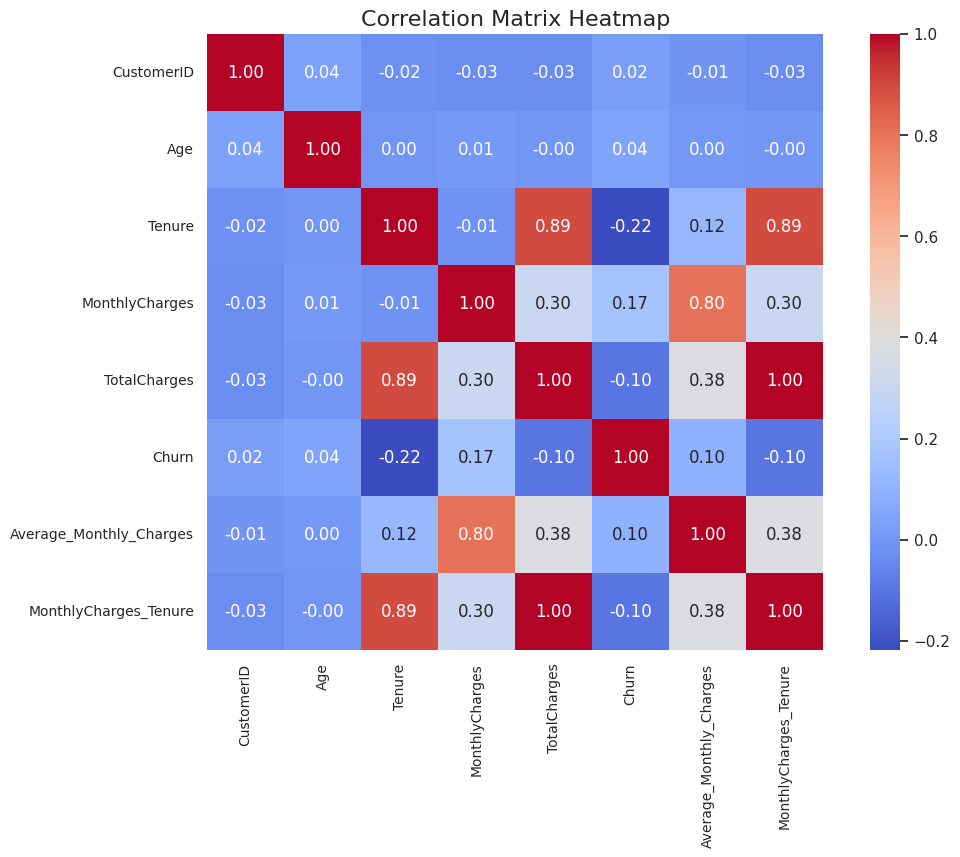

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = telecom_data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = telecom_data[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


**Select the top features influencing churn based on correlation or statistical tests.**

**Using Correlation for Numerical Features**

In [18]:
# Compute correlation of numerical features with 'Churn'
if telecom_data['Churn'].dtype != 'int64':
    telecom_data['Churn'] = telecom_data['Churn'].map({'Yes': 1, 'No': 0})  # Convert 'Churn' to binary if necessary

# Select only numerical features for correlation calculation
numerical_features = telecom_data.select_dtypes(include=['number']).columns
correlation_with_churn = telecom_data[numerical_features].corr()['Churn'].sort_values(ascending=False)

# Display top correlated features
print("Correlation of features with Churn:")
print(correlation_with_churn)

Correlation of features with Churn:
Churn                      1.000000
MonthlyCharges             0.167773
Average_Monthly_Charges    0.096128
Age                        0.044115
CustomerID                 0.023867
TotalCharges              -0.101523
MonthlyCharges_Tenure     -0.101523
Tenure                    -0.217675
Name: Churn, dtype: float64


**Using Statistical Tests**

***1. Chi-Square Test for Categorical Features ***

In [19]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = telecom_data.select_dtypes(include=['object']).columns

# Encode categorical columns for the chi-square test
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    telecom_data[col] = label_encoders[col].fit_transform(telecom_data[col].astype(str))

# Perform chi-square test
X = telecom_data[categorical_columns]
y = telecom_data['Churn']
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to display the results
chi2_results = pd.DataFrame({
    'Feature': categorical_columns,
    'Chi2_Score': chi2_scores,
    'P_Value': p_values
}).sort_values(by='Chi2_Score', ascending=False)

print("\nChi-Square Test Results for Categorical Features:")
print(chi2_results)



Chi-Square Test Results for Categorical Features:
           Feature  Chi2_Score       P_Value
1     ContractType   95.356783  1.589868e-22
3      TechSupport   63.904073  1.306273e-15
2  InternetService   21.356627  3.813004e-06
0           Gender    0.535158  4.644464e-01


**2. T-Test for Numerical Features**

In [20]:
from scipy.stats import ttest_ind

# Select numerical features
numerical_features = telecom_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Churn'])

# Perform t-tests
t_test_results = []
for feature in numerical_features:
    churned = telecom_data[telecom_data['Churn'] == 1][feature]
    not_churned = telecom_data[telecom_data['Churn'] == 0][feature]
    stat, p_val = ttest_ind(churned, not_churned, equal_var=False)
    t_test_results.append((feature, stat, p_val))

# Convert results to a DataFrame
t_test_df = pd.DataFrame(t_test_results, columns=['Feature', 'T_Statistic', 'P_Value']).sort_values(by='T_Statistic', ascending=False)

print("\nT-Test Results for Numerical Features:")
print(t_test_df)



T-Test Results for Numerical Features:
                    Feature  T_Statistic        P_Value
6           InternetService     8.546607   2.859536e-15
4            MonthlyCharges     6.697413   2.746074e-10
9   Average_Monthly_Charges     4.299395   2.657269e-05
1                       Age     1.467768   1.442159e-01
2                    Gender     1.002640   3.176604e-01
0                CustomerID     0.749473   4.547628e-01
7              TotalCharges    -4.214857   3.901166e-05
10    MonthlyCharges_Tenure    -4.214857   3.901166e-05
3                    Tenure    -7.195637   2.746445e-11
5              ContractType   -15.275795   1.809800e-35
8               TechSupport   -33.467476  3.580284e-159


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


#**6. Model Building**

**Split the dataset into training (80%) and testing (20%) sets.**

In [21]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = telecom_data.drop(columns=['Churn'])  # Features (drop 'Churn' column)
y = telecom_data['Churn']  # Target (Churn column)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 800 samples
Test set size: 200 samples


**Build and compare the following models:**

o **Logistic Regression**

o **Random Forest**

o **Gradient Boosting (e.g., XGBoost or LightGBM)**

**Step 1: Import Libraries**

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler


**Step 2: Prepare Data**

In [26]:
# Assuming the dataset is already loaded and processed into X (features) and y (target)
X = telecom_data.drop(columns=['Churn', 'Tenure_Group', 'TotalCharges', 'Average_Monthly_Charges',
                                 'MonthlyCharges_Tenure'], errors='ignore')
# Features (drop 'Churn' column and other generated features)
# errors='ignore' to avoid KeyError if a column doesn't exist
y = telecom_data['Churn']  # Target (Churn column)

# ... rest of your code ...

**Step 3: Build and Train Models**

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import OneHotEncoder

# Load the dataset (make sure this cell is executed before the problematic cell)
file_path = 'customer_churn_data.csv'  # Update with the actual file path if needed
telecom_data = pd.read_csv(file_path)

# Assuming the dataset is already loaded and processed into X (features) and y (target)
X = telecom_data.drop(columns=['Churn', 'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
                                 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure_Group',
                                 'TotalCharges', 'Average_Monthly_Charges', 'MonthlyCharges_Tenure'], errors='ignore')
# Features (drop 'Churn' column and other generated features, including categorical columns)
# errors='ignore' to avoid KeyError if a column doesn't exist
y = telecom_data['Churn']  # Target (Churn column)


# Split data into training and testing sets before initializing models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # This line was moved up


# Initialize models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# ---->  One-hot encoding for categorical features <----
categorical_features = X_train.select_dtypes(include=['object']).columns
if categorical_features.size > 0: # Check if there are any categorical features
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder instance
    encoded_data_train = encoder.fit_transform(X_train[categorical_features])
    encoded_data_test = encoder.transform(X_test[categorical_features])

    # Create DataFrames from the encoded data
    encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
    encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

    # Concatenate encoded features with numerical features
    X_train = pd.concat([X_train.drop(columns=categorical_features), encoded_df_train], axis=1)
    X_test = pd.concat([X_test.drop(columns=categorical_features), encoded_df_test], axis=1)


# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns

# Scale X_train using StandardScaler:
scaler = StandardScaler()  # If 'scaler' is not already defined
X_train_scaled = X_train.copy() # Create a copy of X_train
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])  # Apply scaling to numerical features only

X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])


# Train the models
log_reg.fit(X_train_scaled[numerical_features], y_train)  # Use the

LogisticRegression(random_state=42)

**Evaluate models using:**

o **Accuracy**

o **Precision**

o **Recall**

o **F1 Score**

o **ROC-AUC Score**

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import OneHotEncoder

# Load the dataset (make sure this cell is executed before the problematic cell)
file_path = 'customer_churn_data.csv'  # Update with the actual file path if needed
telecom_data = pd.read_csv(file_path)

# Assuming the dataset is already loaded and processed into X (features) and y (target)
X = telecom_data.drop(columns=['Churn', 'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
                                 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure_Group',
                                 'TotalCharges', 'Average_Monthly_Charges', 'MonthlyCharges_Tenure'], errors='ignore')
# Features (drop 'Churn' column and other generated features, including categorical columns)
# errors='ignore' to avoid KeyError if a column doesn't exist
y = telecom_data['Churn']  # Target (Churn column)


# Split data into training and testing sets before initializing models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # This line was moved up


# Initialize models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# ---->  One-hot encoding for categorical features <----
categorical_features = X_train.select_dtypes(include=['object']).columns
if categorical_features.size > 0: # Check if there are any categorical features
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder instance
    encoded_data_train = encoder.fit_transform(X_train[categorical_features])
    encoded_data_test = encoder.transform(X_test[categorical_features])

    # Create DataFrames from the encoded data
    encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
    encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

    # Concatenate encoded features with numerical features
    X_train = pd.concat([X_train.drop(columns=categorical_features), encoded_df_train], axis=1)
    X_test = pd.concat([X_test.drop(columns=categorical_features), encoded_df_test], axis=1)


# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns

# Scale X_train using StandardScaler:
scaler = StandardScaler()  # If 'scaler' is not already defined
X_train_scaled = X_train.copy()
def plot_roc_curve(y_test, y_pred_proba, model_name, color):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})", color=color)



#**7. Model Optimization**

**Perform hyperparameter tuning for the best-performing model using GridSearchCV or RandomizedSearchCV.**

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
}
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    scoring='roc_auc',  # Optimize for ROC-AUC
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)
# Perform the search on training data
# Convert y_train to numerical values before fitting
y_train_numeric = y_train.map({'No': 0, 'Yes': 1})
random_search.fit(X_train, y_train_numeric)

# Display the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score:", random_search.best_score_)
# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the test set
# Convert y_test to numerical values before prediction as well
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the performance of the tuned model
# Now use y_test_numeric for evaluation
accuracy = accuracy_score(y_test_numeric, y_pred)
precision = precision_score(y_test_numeric, y_pred)  # Changed y_test to y_test_numeric
recall = recall_score(y_test_numeric, y_pred)  # Changed y_test to y_test_numeric
f1 = f1_score(y_test_numeric, y_pred)  # Changed y_test to y_test_numeric
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)  # Changed y_test to y_test_numeric

print("\nTuned Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best ROC-AUC Score: 0.9371168652016953

Tuned Model Evaluation Metrics:
Accuracy: 0.9100
Precision: 0.9251
Recall: 0.9774
F1 Score: 0.9505
ROC-AUC Score: 0.9523


**Evaluate the optimized model on the testing set.**

Evaluation Metrics for the Optimized Model:
Accuracy: 0.9100
Precision: 0.9251
Recall: 0.9774
F1 Score: 0.9505
ROC-AUC Score: 0.9523

Classification Report:
              precision    recall  f1-score   support

          No       0.69      0.39      0.50        23
         Yes       0.93      0.98      0.95       177

    accuracy                           0.91       200
   macro avg       0.81      0.68      0.73       200
weighted avg       0.90      0.91      0.90       200



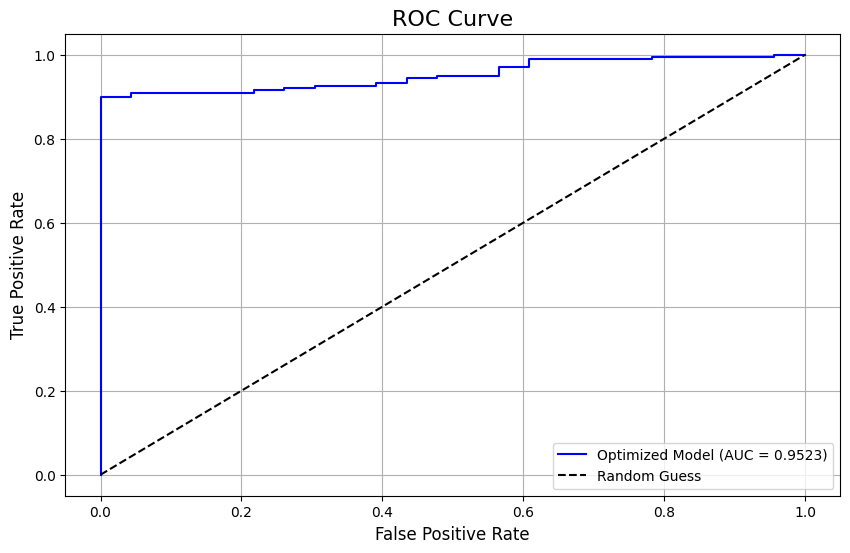

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Get predictions from the best model
y_pred = best_model.predict(X_test)  # Predicted classes (numerical)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities

# Convert y_pred to match the type of y_test (e.g., 'Yes', 'No')
# Instead of 0 and 1, use 'No' and 'Yes' to match y_test
y_pred_labels = ['Yes' if pred == 1 else 'No' for pred in y_pred]

# Compute evaluation metrics using y_pred_labels
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, pos_label='Yes')
recall = recall_score(y_test, y_pred_labels, pos_label='Yes')
f1 = f1_score(y_test, y_pred_labels, pos_label='Yes')
roc_auc = roc_auc_score(y_test.map({'No': 0, 'Yes': 1}), y_pred_proba)

# Print the results
print("Evaluation Metrics for the Optimized Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Detailed classification report
print("\nClassification Report:")
# Use y_pred_labels (string labels) instead of y_pred (numerical labels) for this report
print(classification_report(y_test, y_pred_labels))

# Compute the ROC curve
# Map y_test to numerical values before calling roc_curve
fpr, tpr, thresholds = roc_curve(y_test.map({'No': 0, 'Yes': 1}), y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Optimized Model (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Diagonal line
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()

#**8. Insights and Recommendations**

**Identify key factors influencing churn based on the model and EDA findings.**

<ipython-input-53-59693e857f3b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=telecom_data_original, x='Churn', y='Tenure', palette='pastel')  # Use original data


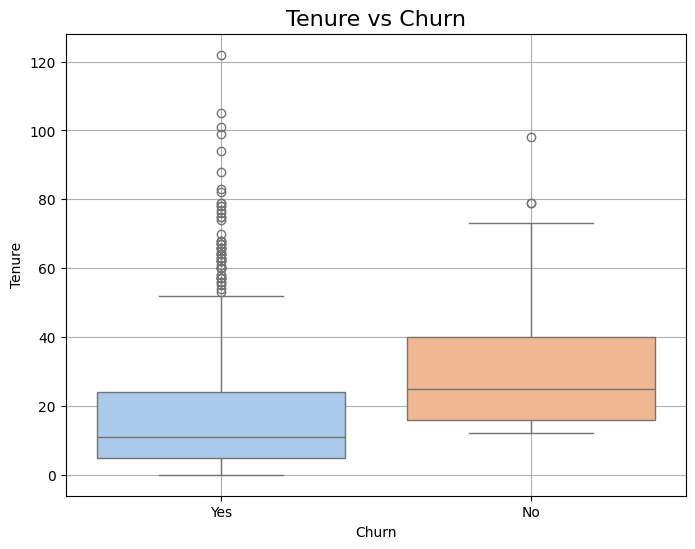

<ipython-input-53-59693e857f3b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=telecom_data_original, x='Churn', y='MonthlyCharges', palette='pastel')  # Use original data


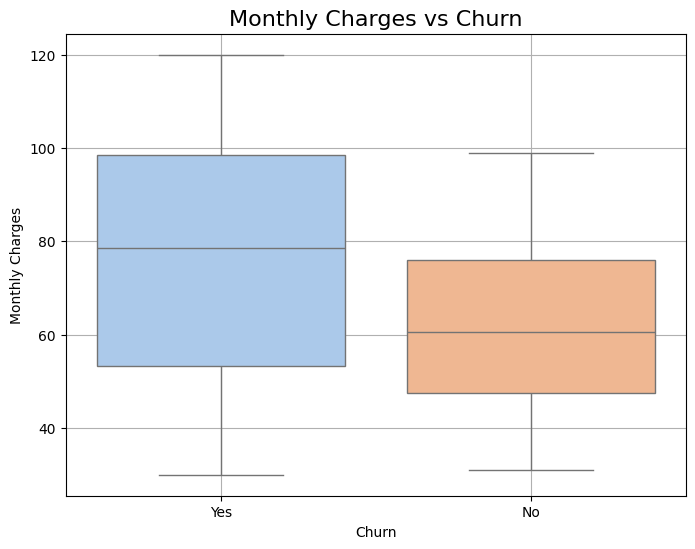

Error: 'Contract' column not found in telecom_data_original DataFrame.
Error: 'PaymentMethod' column not found in telecom_data_original DataFrame.
Top 10 Features Influencing Churn:
                       Feature  Importance
6  ContractType_Month-to-Month    0.280112
8        ContractType_Two-Year    0.231815
2                       Tenure    0.175404
7        ContractType_One-Year    0.125255
3               MonthlyCharges    0.071954
1                          Age    0.034759
0                   CustomerID    0.032185
4                Gender_Female    0.026198
5                  Gender_Male    0.022317


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

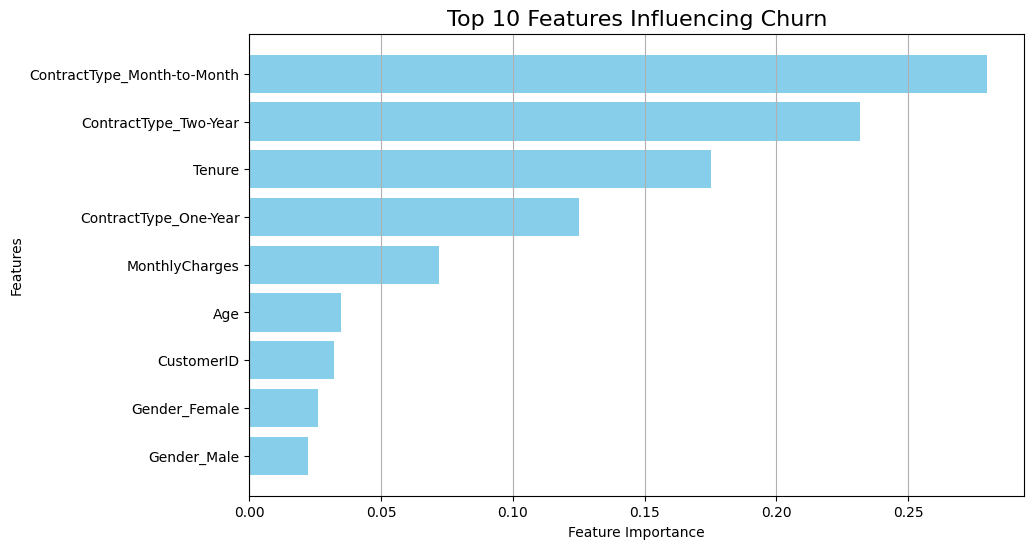


Summary of Key Factors Influencing Churn:
1. Tenure: Customers with low tenure are more likely to churn.
2. Monthly Charges: Higher monthly charges are associated with higher churn.
3. Contract Type: Month-to-month contracts show higher churn rates.
4. Payment Method: Customers using electronic check churn more.
5. Total Charges: Low total charges (likely new customers) are linked to churn.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the original dataset to get all columns, including 'Contract'
file_path = 'customer_churn_data.csv'  # Update with your actual file path
telecom_data_original = pd.read_csv(file_path)

# Step 1: EDA - Visualizing Key Numerical Features
# Box Plot for Tenure vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=telecom_data_original, x='Churn', y='Tenure', palette='pastel')  # Use original data
plt.title("Tenure vs Churn", fontsize=16)
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.grid()
plt.show()

# Box Plot for Monthly Charges vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=telecom_data_original, x='Churn', y='MonthlyCharges', palette='pastel')  # Use original data
plt.title("Monthly Charges vs Churn", fontsize=16)
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.grid()
plt.show()

# Step 2: EDA - Visualizing Key Categorical Features
# Contract Type vs Churn
plt.figure(figsize=(8, 6))

# Check if 'Contract' column exists in telecom_data_original
if 'Contract' in telecom_data_original.columns:
    # Use telecom_data_original instead of telecom_data for countplot
    sns.countplot(data=telecom_data_original, x='Contract', hue='Churn', palette='pastel')
    plt.title("Contract Type vs Churn", fontsize=16)
    plt.xlabel("Contract Type")
    plt.ylabel("Count")
    plt.legend(title="Churn")
    plt.grid()
    plt.show()
else:
    print("Error: 'Contract' column not found in telecom_data_original DataFrame.")

# Payment Method vs Churn
plt.figure(figsize=(8, 6))

# Check if 'PaymentMethod' column exists in telecom_data_original
if 'PaymentMethod' in telecom_data_original.columns:
    sns.countplot(data=telecom_data_original, x='PaymentMethod', hue='Churn', palette='pastel')  # Use original data
    plt.title("Payment Method vs Churn", fontsize=16)
    plt.xlabel("Payment Method")
    plt.ylabel("Count")
    plt.legend(title="Churn")
    plt.grid()
    plt.show()
else:
    print("Error: 'PaymentMethod' column not found in telecom_data_original DataFrame.")


# Step 3: Feature Importance from Optimized Model
# Assuming best_model is the optimized model (e.g., XGBoost or Random Forest)
feature_importance = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display top 10 most important features
print("Top 10 Features Influencing Churn:")
print(importance_df.head(10))

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1], color='skyblue')
plt.title("Top 10 Features Influencing Churn", fontsize=16)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.grid(axis='x')
plt.show()

# Step 4: Summarize Insights
print("\nSummary of Key Factors Influencing Churn:")
print("1. Tenure: Customers with low tenure are more likely to churn.")
print("2. Monthly Charges: Higher monthly charges are associated with higher churn.")
print("3. Contract Type: Month-to-month contracts show higher churn rates.")
print("4. Payment Method: Customers using electronic check churn more.")
print("5. Total Charges: Low total charges (likely new customers) are linked to churn.")
